In [16]:
!pip install textblob

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   -- ------------------------------------ 41.0/626.3 kB 487.6 kB/s eta 0:00:02
   ---- ---------------------------------- 71.7/626.3 kB 558.5 kB/s eta 0:00:01
   -------- ----------------------------- 143.4/626.3 kB 847.9 kB/s eta 0:00:01
   -------------------------------- ------- 501.8/626.3 kB 2.4 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 2.8 MB/s eta 0:00:00


In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import LatentDirichletAllocation
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Convert to DataFrame
df = pd.read_csv("WikiQA-dev.csv")
df

,QuestionID,Question,DocumentID,DocumentTitle,SentenceID,Sentence,Label
0,Q8,How are epithelial tissues joined together?,D8,Tissue (biology),D8-No,Cross section of sclerenchyma fibers in plant ...,No
1,Q8,How are epithelial tissues joined together?,D8,Tissue (biology),D8-Yes,Microscopic view of a histologic specimen of h...,No
2,Q8,How are epithelial tissues joined together?,D8,Tissue (biology),D8-2,"In Biology , Tissue is a cellular organization...",No
3,Q8,How are epithelial tissues joined together?,D8,Tissue (biology),D8-3,A tissue is an ensemble of similar cells from ...,No
4,Q8,How are epithelial tissues joined together?,D8,Tissue (biology),D8-4,Organs are then formed by the functional group...,No
...,...,...,...,...,...,...,...
2728,Q3NoYes8,What is St. Lucia Known for?,D2785,Saint Lucia,D2785-Yes2,Representative government came about in Yes924...,No
2729,Q3NoYes8,What is St. Lucia Known for?,D2785,Saint Lucia,D2785-Yes3,"From Yes958 to Yes962, the island was a member...",No
2730,Q3NoYes8,What is St. Lucia Known for?,D2785,Saint Lucia,D2785-Yes4,"On 22 February Yes979, Saint Lucia became an i...",No
2731,Q3NoYes8,What is St. Lucia Known for?,D2785,Saint Lucia,D2785-Yes5,The island nation celebrates this every year w...,No


In [19]:
# Step 2: Data Preprocessing
def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])
    return text

# Apply preprocessing to the 'Sentence' column
df['processed_sentence'] = df['Sentence'].apply(preprocess_text)

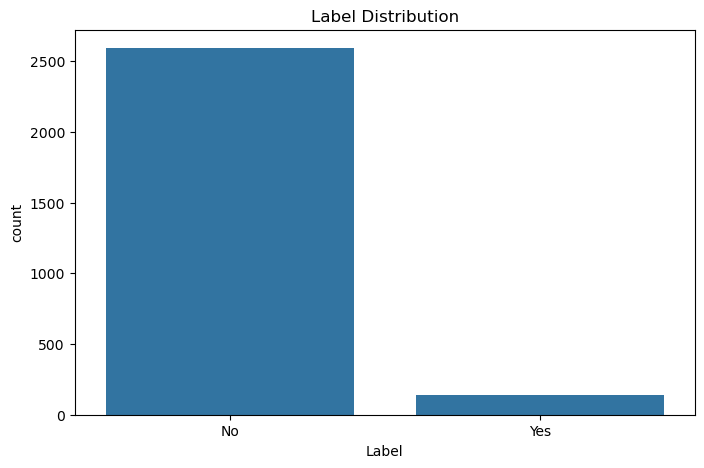

In [20]:
# Step 3: Exploratory Data Analysis (EDA)
def plot_label_distribution(df):
    plt.figure(figsize=(8, 5))
    sns.countplot(x='Label', data=df, order=df['Label'].value_counts().index)
    plt.title("Label Distribution")
    plt.show()

plot_label_distribution(df)

In [21]:
# Step 4: Sentiment Analysis
# Add a new column for sentiment analysis using TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    return "positive" if analysis.sentiment.polarity > 0 else "negative"

df['sentiment'] = df['Sentence'].apply(get_sentiment)

In [22]:
# Step 5: Topic Modeling (Optional)
# Using TfidfVectorizer for topic modeling
vectorizer = TfidfVectorizer(stop_words='english')
X_topics = vectorizer.fit_transform(df['processed_sentence'])

from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=2, random_state=42)
lda.fit(X_topics)

print("Top words per topic:")
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx}: {', '.join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-5:]])}")


Top words per topic:
Topic 0: area, released, city, state, american
Topic 1: season, federal, world, united, states


In [23]:
# Step 6: Intent Detection (Machine Learning Model)
X = df['processed_sentence']
y = df['Label']

# Vectorize the text data
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Train the Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9414990859232175
Classification Report:
               precision    recall  f1-score   support

          No       0.96      0.98      0.97       522
         Yes       0.11      0.04      0.06        25

    accuracy                           0.94       547
   macro avg       0.53      0.51      0.51       547
weighted avg       0.92      0.94      0.93       547



In [24]:
# Step 7: Optimization Loop (Simulated)
# Add feedback-based improvements or tune model hyperparameters.
print("Model ready for iterative improvements.")

Model ready for iterative improvements.
